# Importing Liabraries

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Thiết lập kiểu mặc định cho các biểu đồ Seaborn

# Các thư viện bổ sung cho việc trực quan hóa và vẽ biểu đồ
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix

# Các thư viện cho các tác vụ học máy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Để loại bỏ các cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Vẽ biểu đồ trực tiếp trong Jupyter Notebook
%matplotlib inline


# Reading the Data from the CSV file

In [7]:
# Đọc file CSV
diabetes_df = pd.read_csv('..\data\diabetes.csv')
# Hiển thị 5 dòng đầu tiên
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [8]:
#Tổng số cột trong tập dữ liệu
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#Thông tin về tập dữ liệu
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Thông tin tổng quan về tập dữ liệu
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#Thông tin tổng quan về tập dữ liệu với phép chuyển vị (transpose)
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
# Kiểm tra xem có giá trị null nào không
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [13]:
# Kiểm tra xem có bao nhiêu giá trị null trong mỗi cột
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
# Sao chép DataFrame để không ảnh hưởng đến bản gốc
diabetes_df_copy = diabetes_df.copy(deep=True)

# Thay thế các giá trị 0 bằng NaN trong các cột đã chọn
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Hiển thị số lượng giá trị NaN trong mỗi cột
print(diabetes_df_copy.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Data Visualization

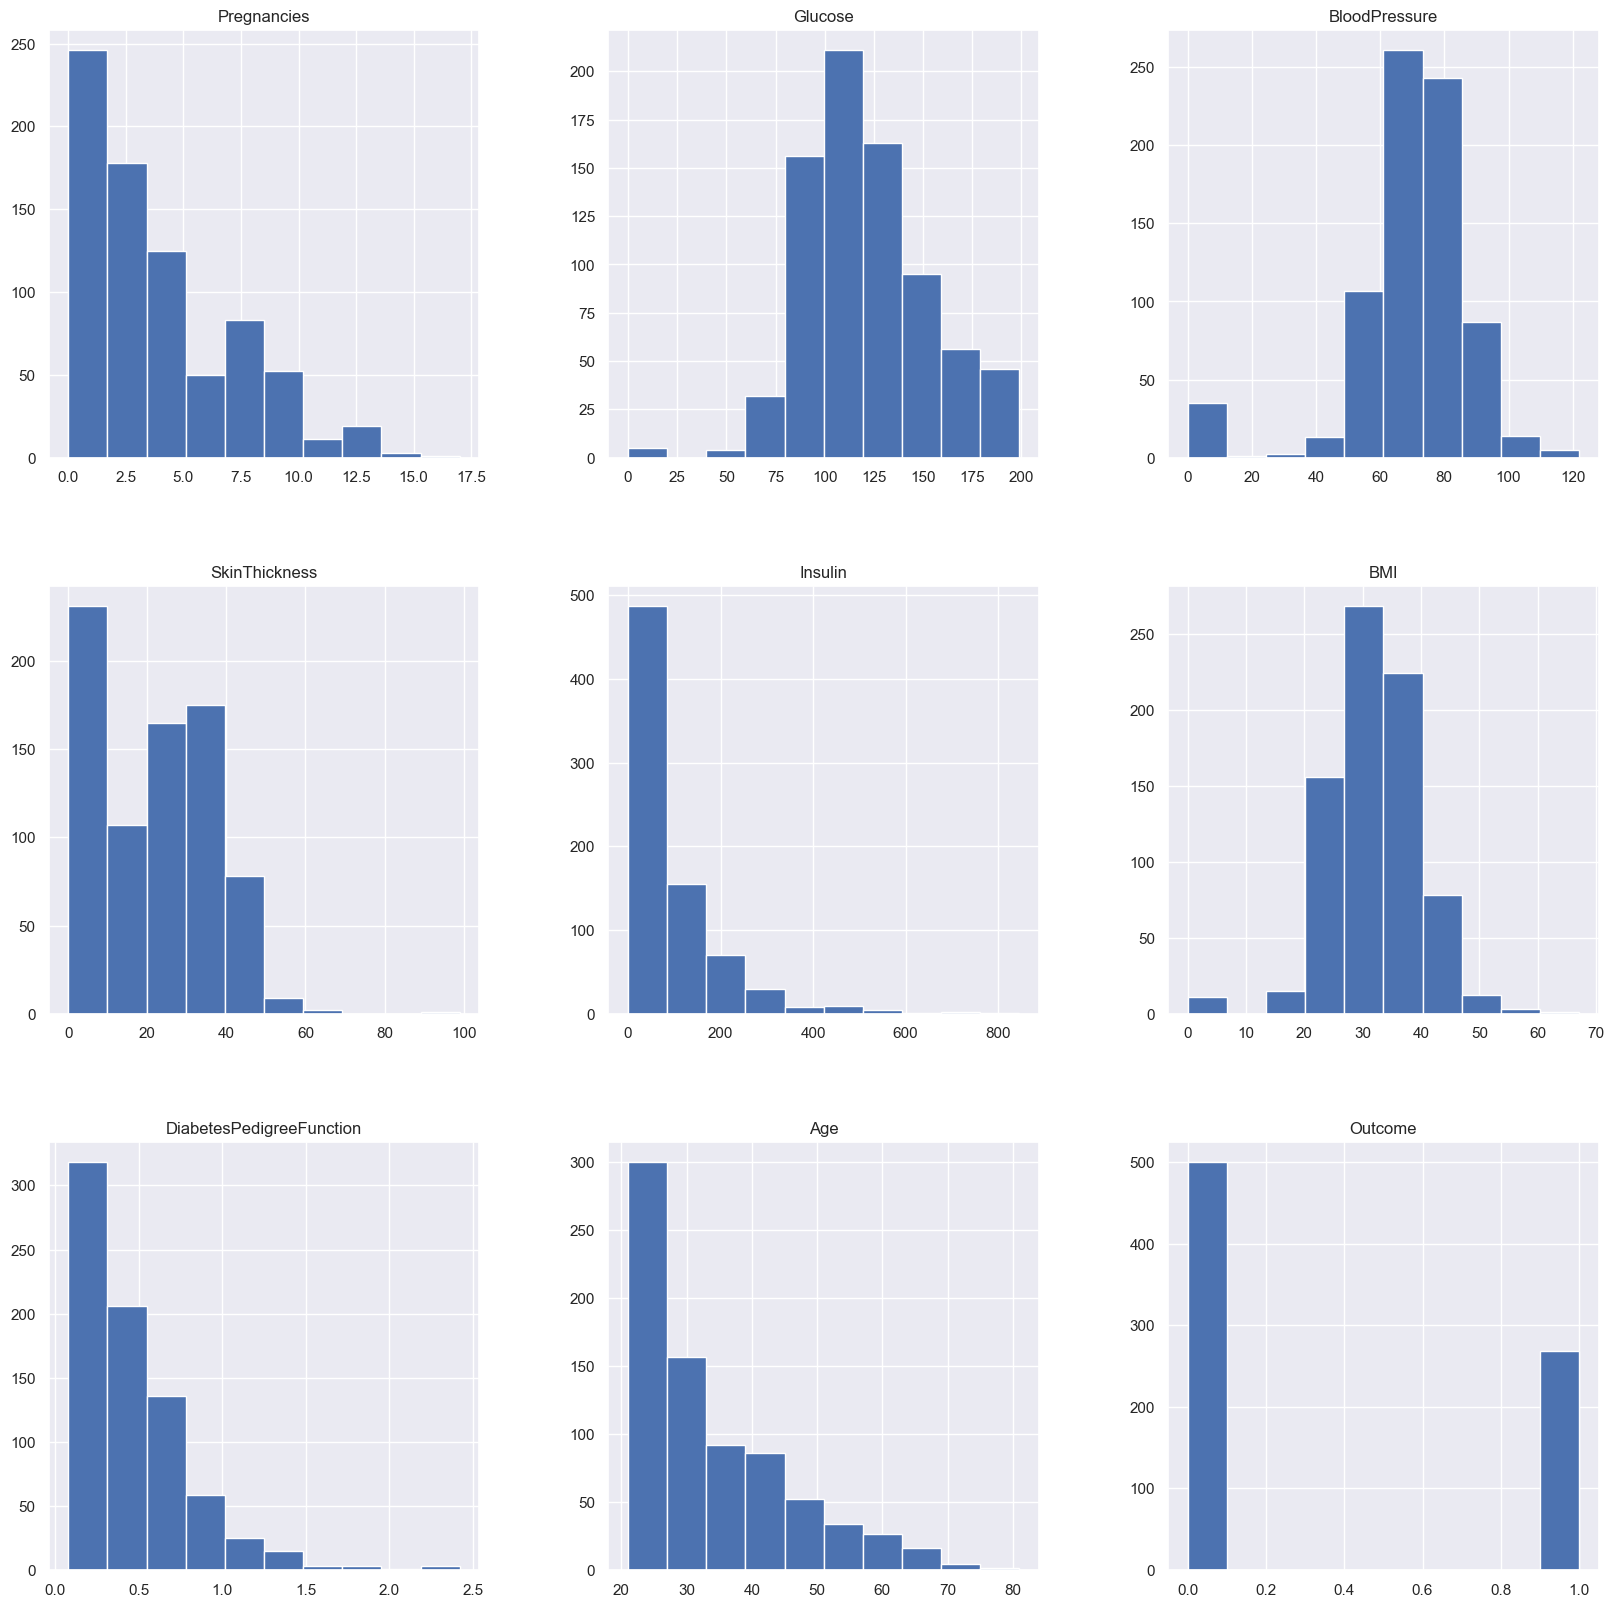

In [16]:
# Vẽ các biểu đồ phân phối dữ liệu
p = diabetes_df.hist(figsize=(20, 20))

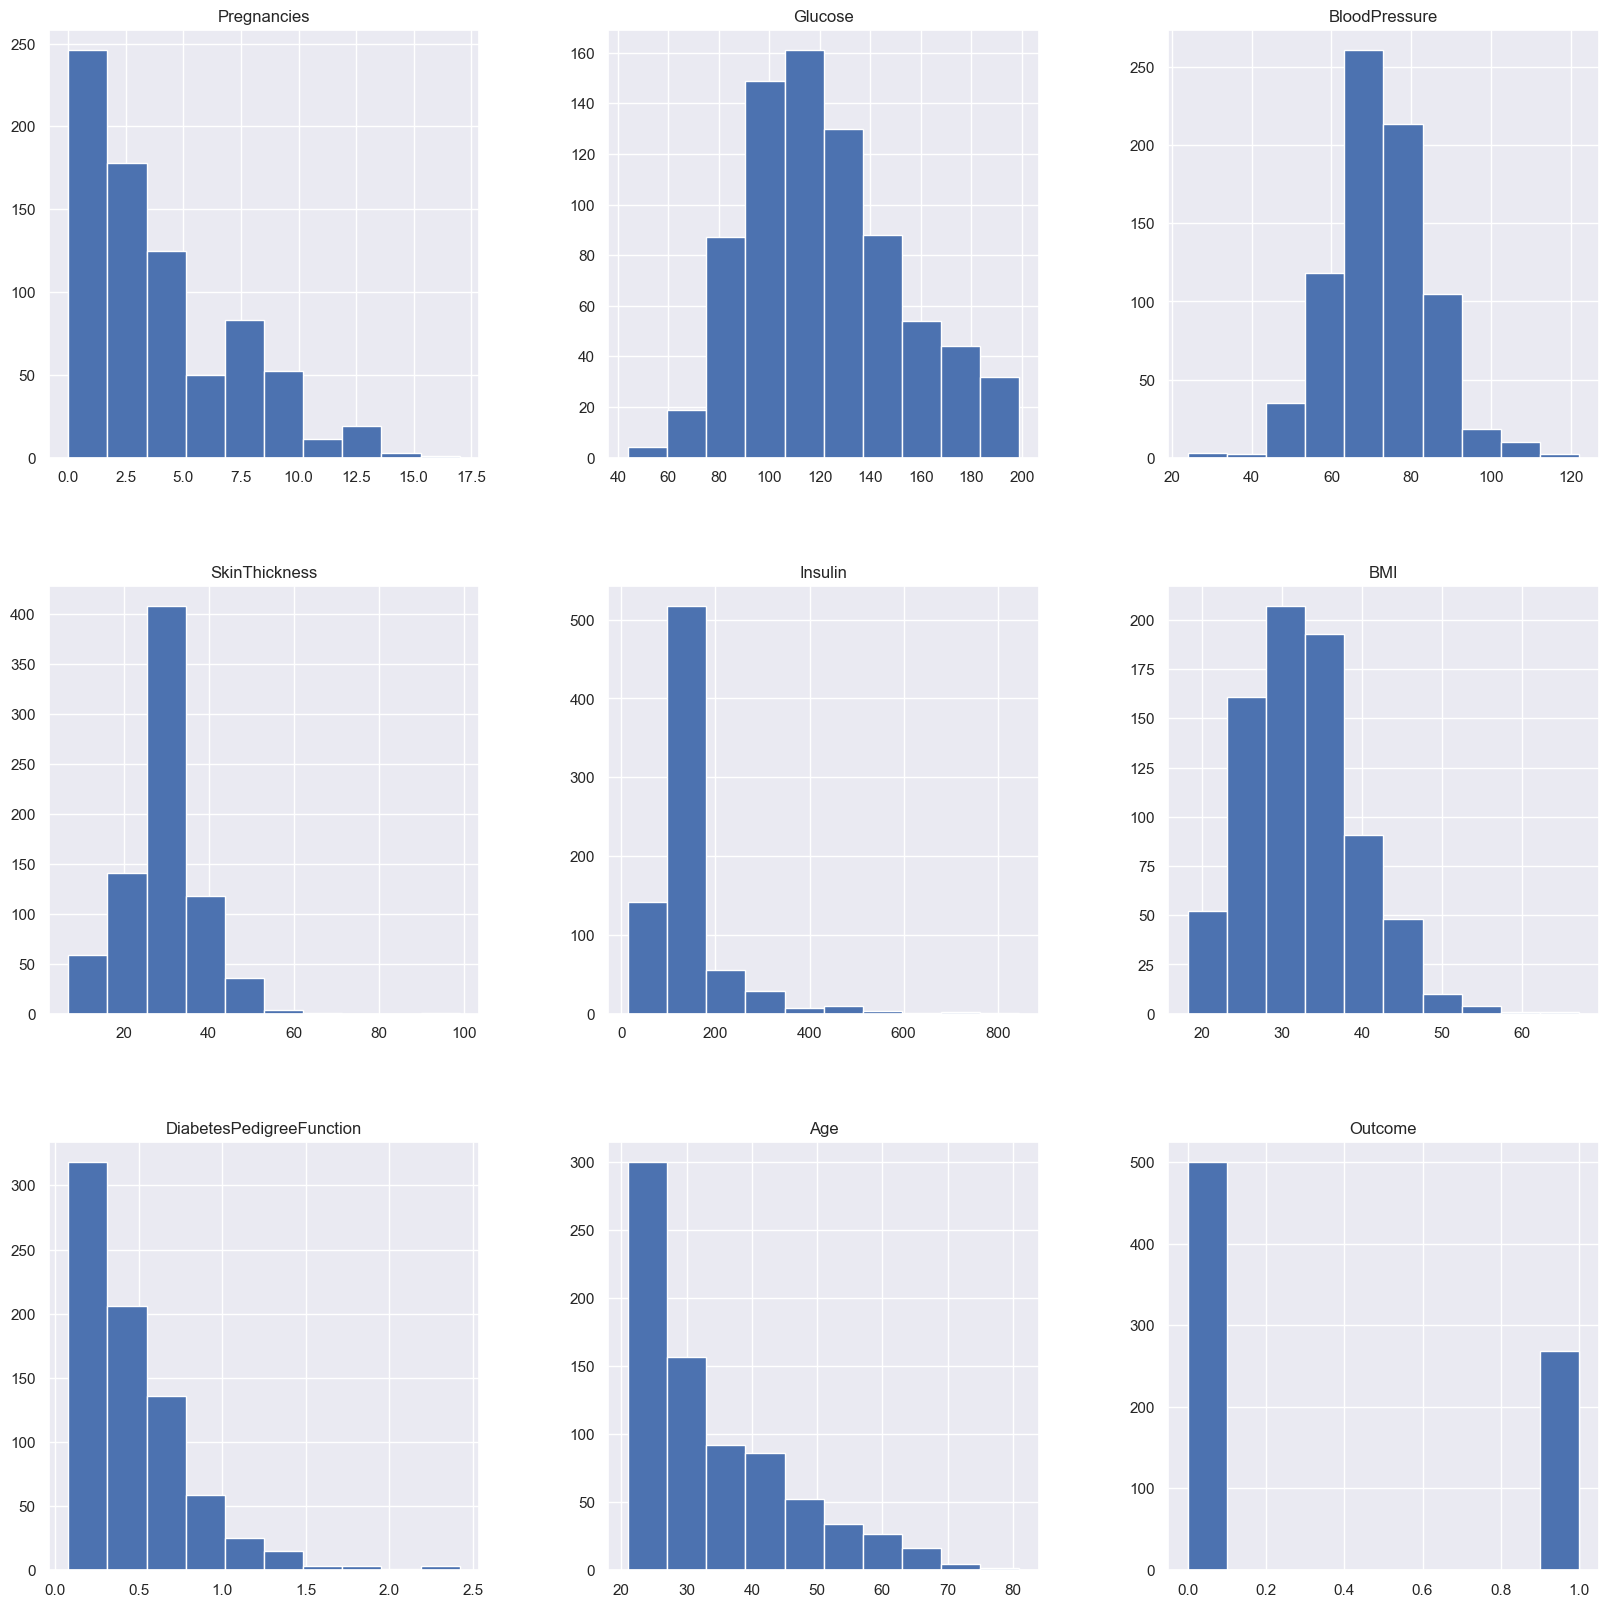

In [21]:
# Điền các giá trị NaN cho các cột tương ứng dựa trên phân phối của chúng
# Điền giá trị trung bình mean() hoặc giá trị trung vị median()
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)

#  Vẽ biểu đồ phân phối sau khi loại bỏ các giá trị NaN
p = diabetes_df_copy.hist(figsize=(20, 20))

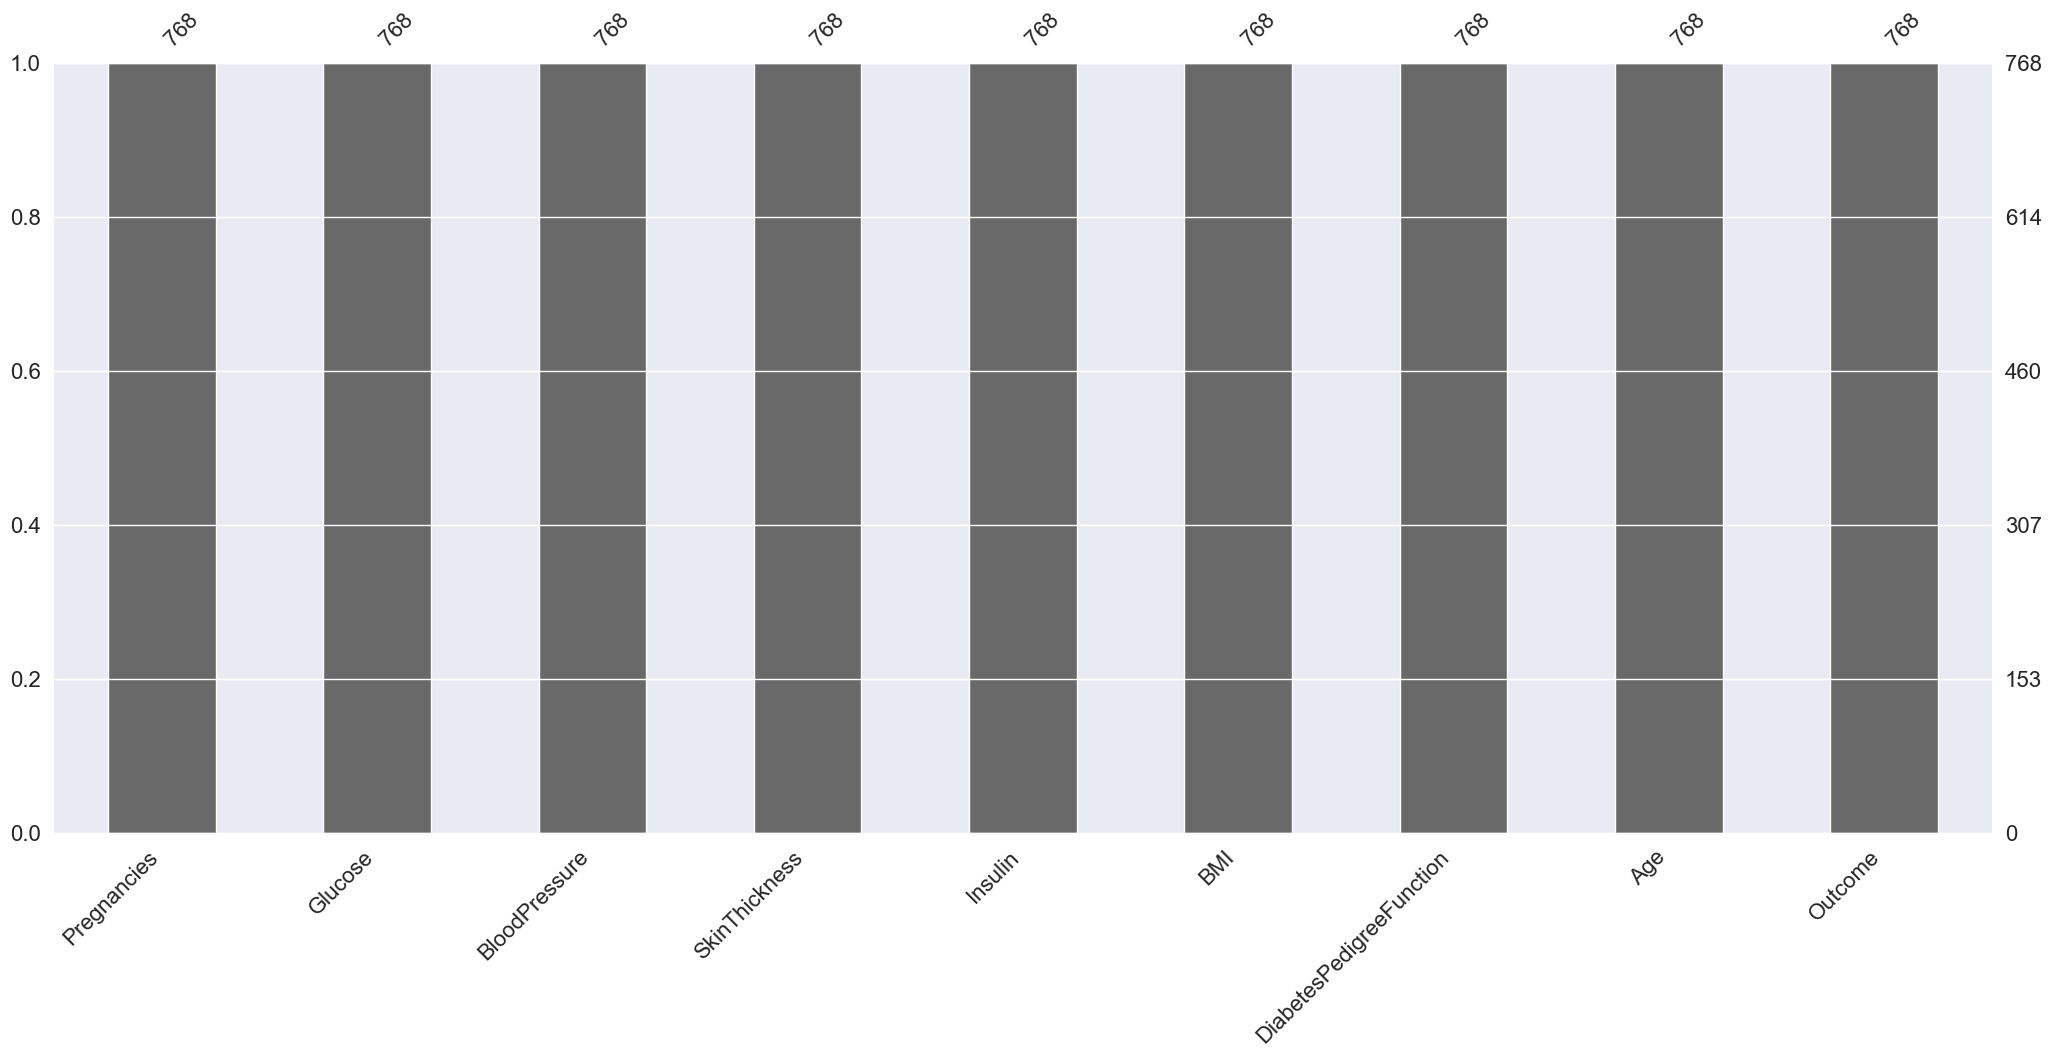

In [22]:
# Vẽ biểu đồ phân tích số lượng giá trị Null
p = msno.bar(diabetes_df)

Outcome
0    500
1    268
Name: count, dtype: int64


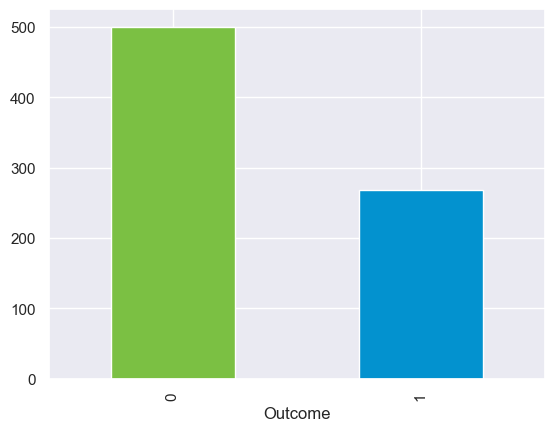

In [ ]:
# Kiểm tra sự cân bằng của dữ liệu bằng cách vẽ số lượng kết quả theo cột "Outcome"
# Định nghĩa màu sắc cho các giá trị kết quả
color_wheel = {1: "#0392cf", 2: "#7bc043"}

# Áp dụng màu sắc cho các giá trị kết quả
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x+1))

# In ra số lượng kết quả của cột "Outcome"
print(diabetes_df.Outcome.value_counts())

# Vẽ biểu đồ cột để hiển thị số lượng kết quả
p = diabetes_df.Outcome.value_counts().plot(kind="bar", color=colors)


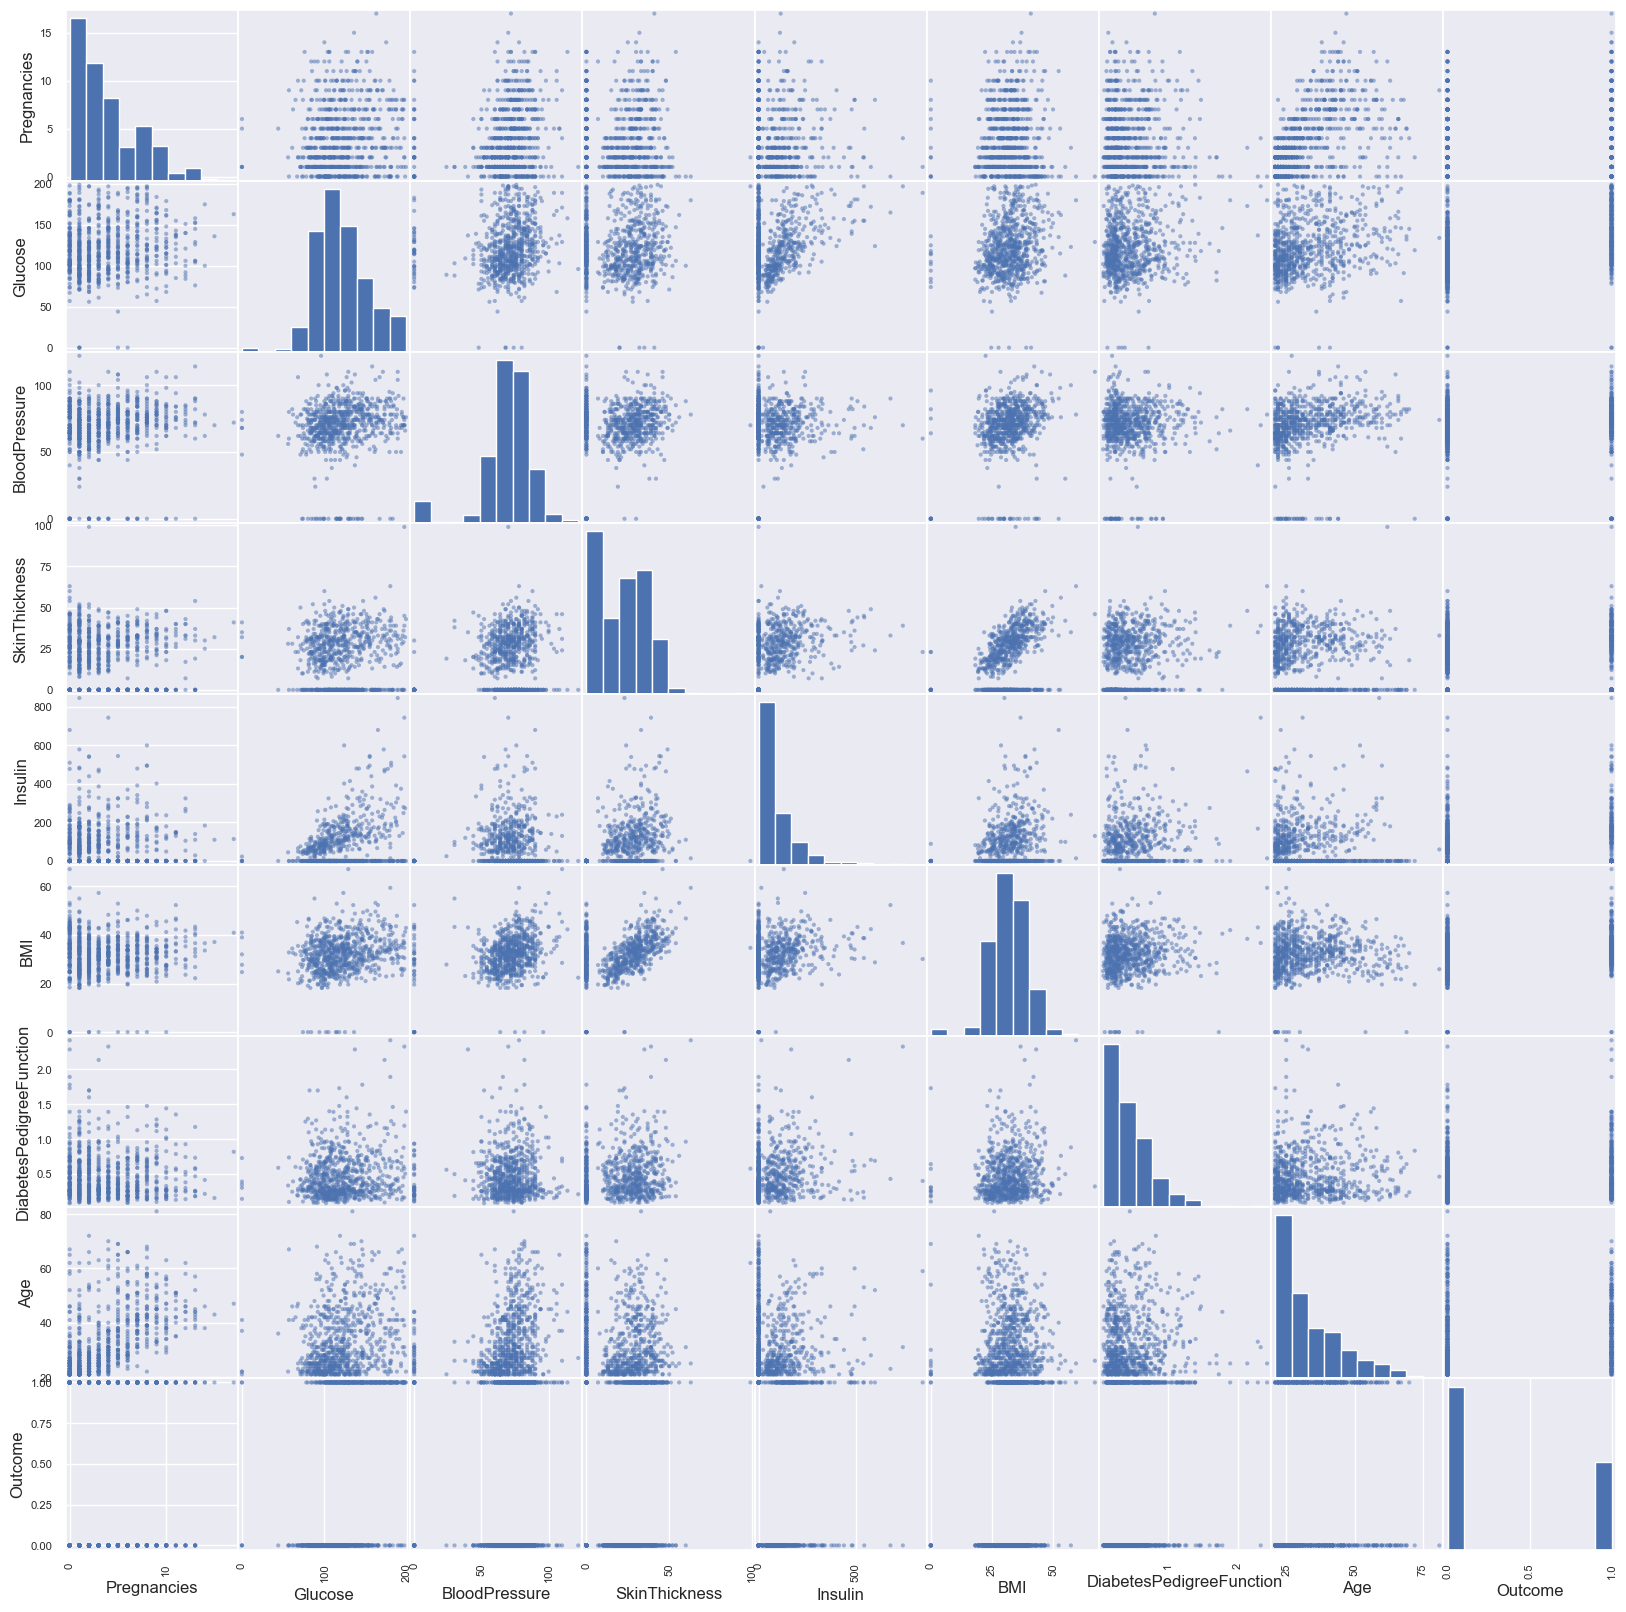

In [25]:
# Vẽ ma trận phân tán của dữ liệu chưa được làm sạch
p = scatter_matrix(diabetes_df, figsize=(20, 20))

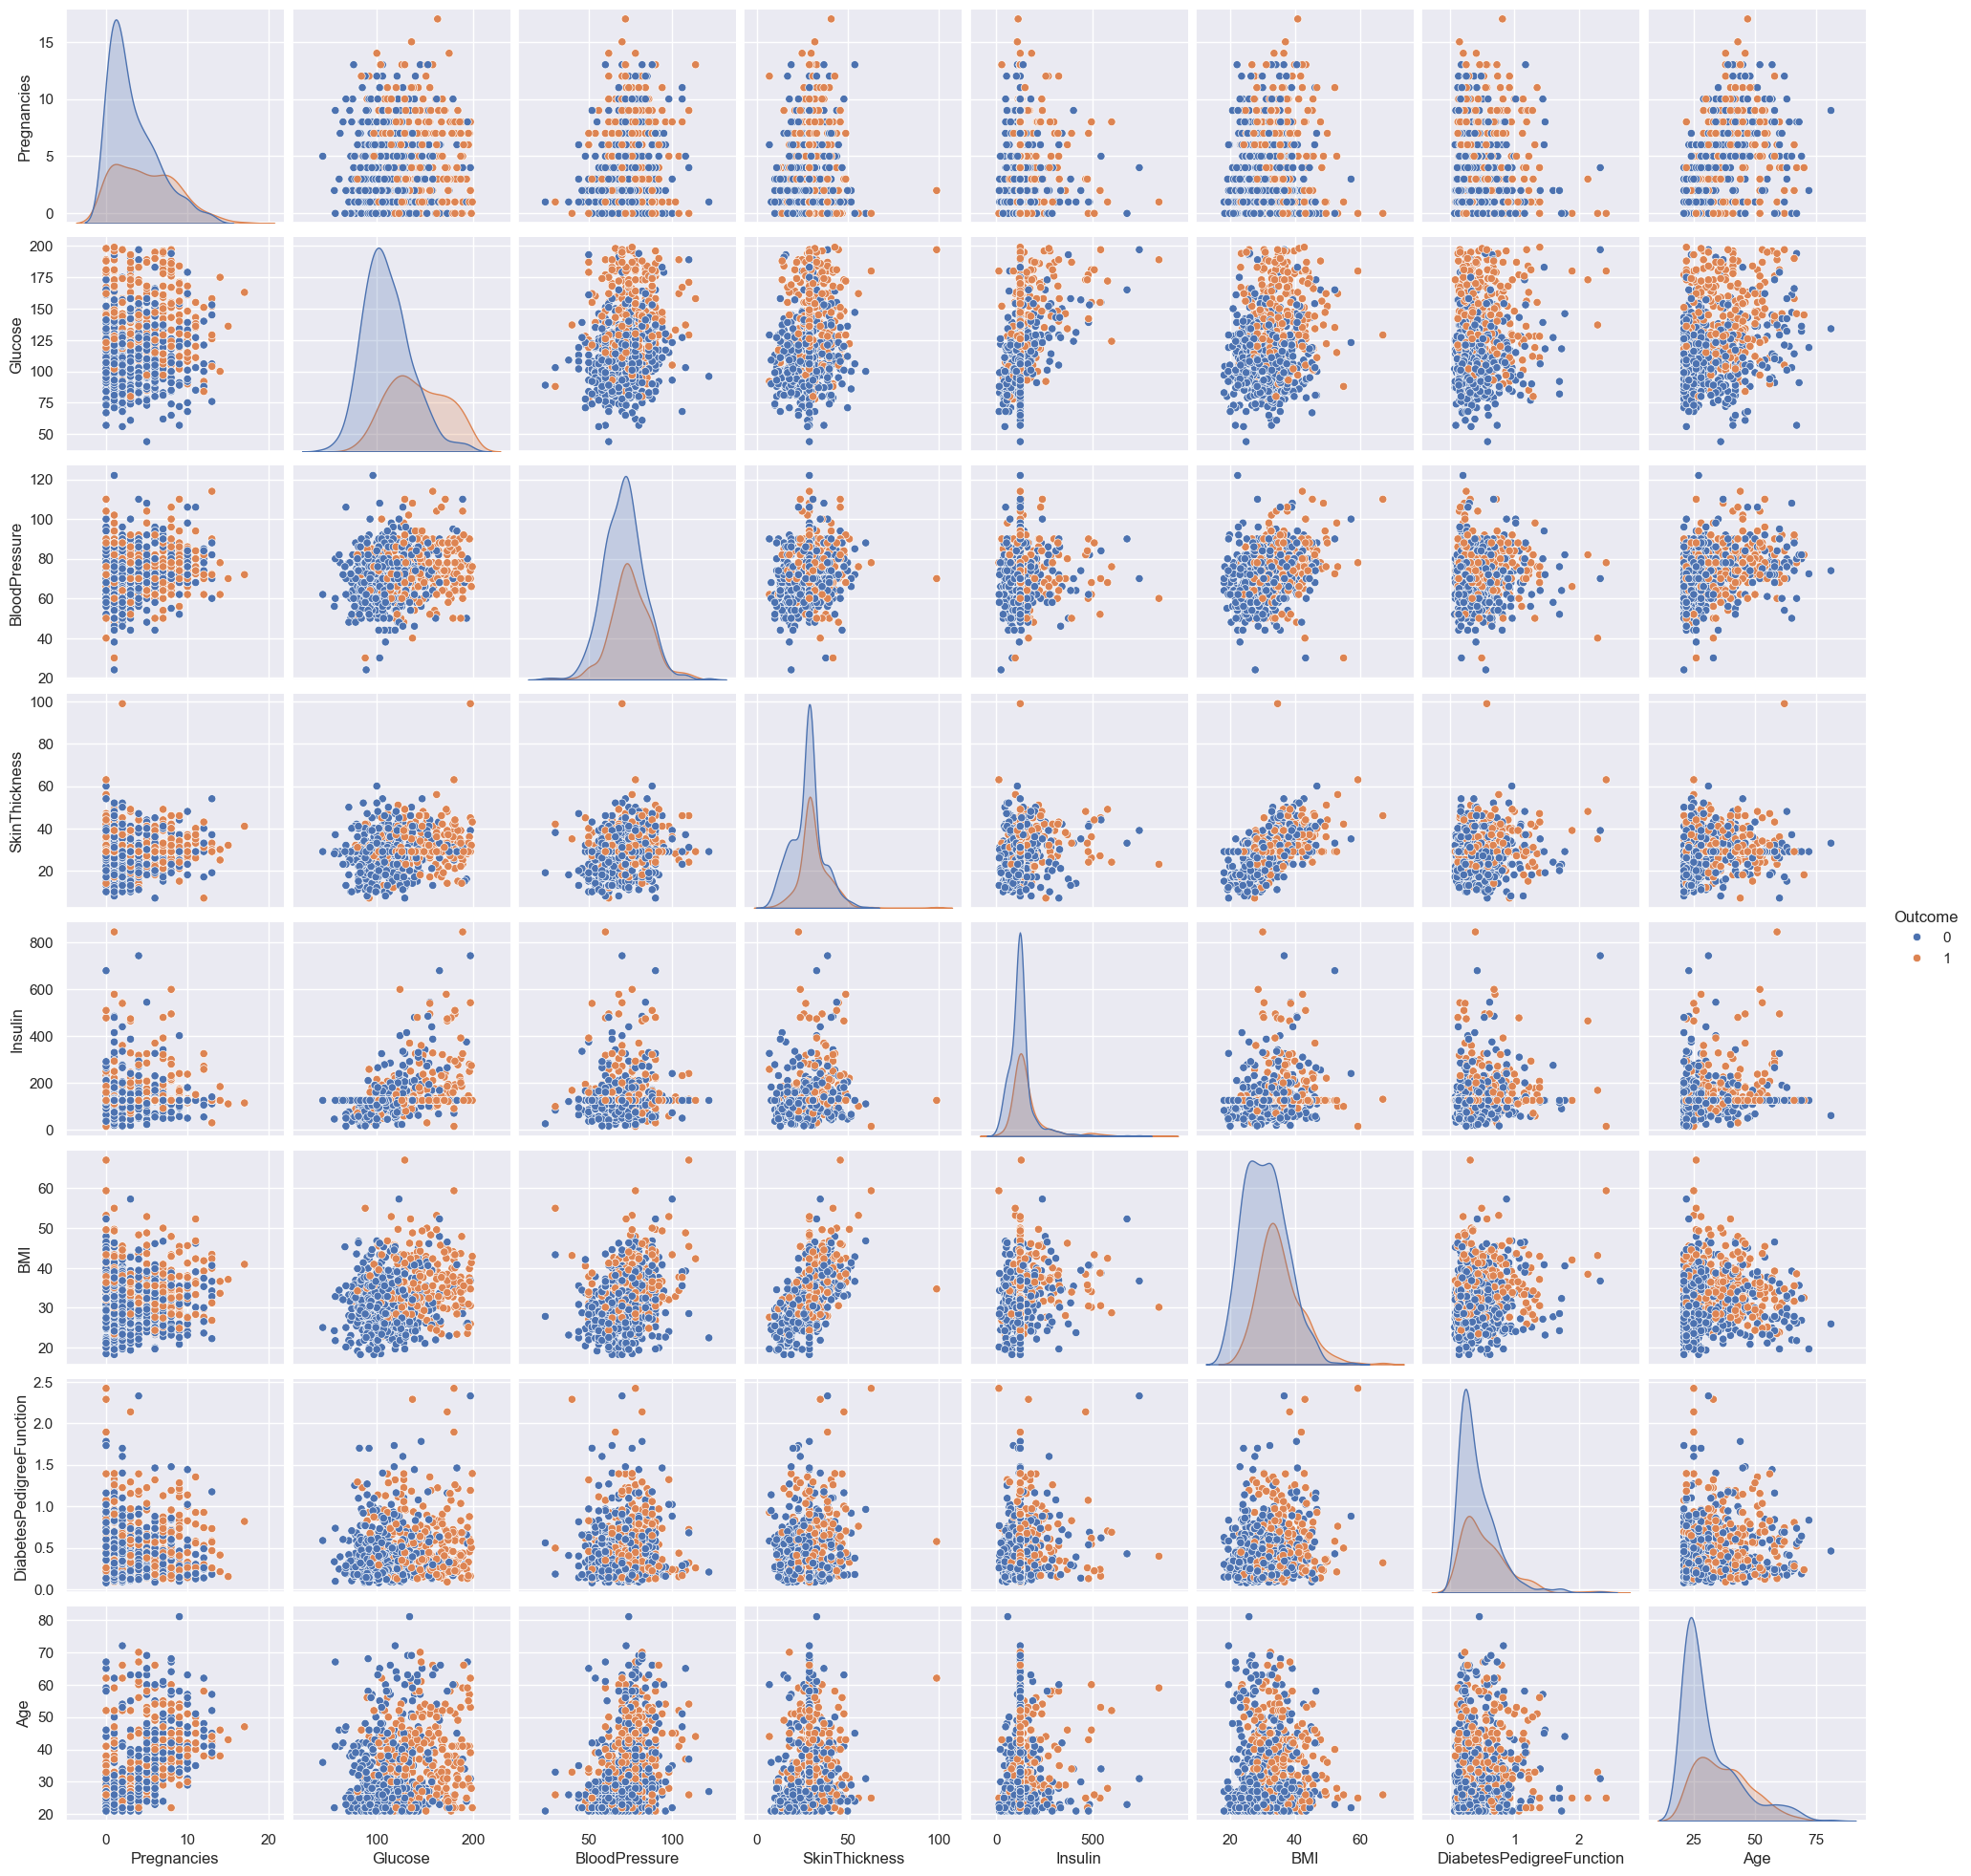

In [ ]:
# Vẽ các biểu đồ cặp (Pair Plots) cho dữ liệu.
p = sns.pairplot(diabetes_df_copy, hue='Outcome')